### 51. Un dummy data frame con variables categóricas

__Agrecación de datos__ :  
+ Significa combinarlos con algún criterio el más típico es utilizar una __variable categórica__ para juntar toda la información referente a una misma categoría
+ Es muy útil para llevar a cabo un análisis categórico y tomar decisiones en base a qué categoría pertenece un elemento del modelo.

In [1]:
import numpy as np
import pandas as pd

In [3]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [4]:
n_filas = 500  # nº de personas

gender_data = []
income_data = []

for i in range(0, n_filas):
    gender_data.append(np.random.choice(gender)) # elegir algo aleatorio
    income_data.append(np.random.choice(income))



In [8]:
gender_data[:5]

['Female', 'Female', 'Male', 'Female', 'Male']

In [10]:
income_data[:5]

['Middle Class', 'Rich', 'Middle Class', 'Rich', 'Rich']

In [12]:
#Z -> N(0,1)
#N(m,n) -> mu + sd *Z
height = 175 + 30 * np.random.randn(n_filas)
weight = 65 + 25 * np.random.randn(n_filas)
age = 30 + 12 * np.random.randn(n_filas)
income = 18000 + 3500 * np.random.randn(n_filas)


In [13]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income": income
    }
)

In [14]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,126.969516,79.815446,34.404717,14709.415878
1,Female,Rich,170.313672,24.260721,44.133110,18514.595255
2,Male,Middle Class,180.896899,77.326882,15.501580,15143.313270
3,Female,Rich,140.662430,37.277220,26.420433,23921.495647
4,Male,Rich,127.120168,107.191656,24.108620,16664.287948


### 52. Agrupación de los datos por categorias

In [22]:
grouped_gender = data.groupby("Gender")
# Obtenemos un objeto interno de pandas con dos atributos: nombre y grupo

In [27]:
# Acceso a través de puntos
grouped_gender.groups


{'Female': [0, 1, 3, 5, 12, 17, 18, 20, 25, 26, 29, 30, 31, 32, 35, 36, 38, 40, 42, 44, 46, 47, 50, 51, 52, 54, 58, 60, 64, 65, 67, 68, 69, 73, 76, 79, 85, 88, 89, 92, 98, 99, 100, 104, 106, 108, 111, 116, 120, 123, 124, 125, 127, 129, 134, 135, 136, 137, 141, 142, 143, 144, 145, 147, 148, 152, 153, 155, 156, 157, 161, 162, 165, 167, 171, 172, 175, 177, 179, 180, 181, 182, 185, 190, 191, 193, 200, 203, 204, 205, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, ...], 'Male': [2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 19, 21, 22, 23, 24, 27, 28, 33, 34, 37, 39, 41, 43, 45, 48, 49, 53, 55, 56, 57, 59, 61, 62, 63, 66, 70, 71, 72, 74, 75, 77, 78, 80, 81, 82, 83, 84, 86, 87, 90, 91, 93, 94, 95, 96, 97, 101, 102, 103, 105, 107, 109, 110, 112, 113, 114, 115, 117, 118, 119, 121, 122, 126, 128, 130, 131, 132, 133, 138, 139, 140, 146, 149, 150, 151, 154, 158, 159, 160, 163, 164, 166, 168, 169, 170, 173, 174, 176, ...]}

In [31]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female    Middle Class  126.969516  79.815446  34.404717  14709.415878
1    Female            Rich  170.313672  24.260721  44.133110  18514.595255
3    Female            Rich  140.662430  37.277220  26.420433  23921.495647
5    Female            Poor  113.236514  65.408331  39.499232  19879.273362
12   Female    Middle Class  148.344699  70.868816  34.831014  19453.655100
..      ...             ...         ...        ...        ...           ...
490  Female            Rich  137.534755  67.134712  23.269562  20087.597266
492  Female            Rich  212.287785  39.599530  41.054713  19619.724890
495  Female            Poor  128.456076  79.739357  24.621769  21027.591578
496  Female            Poor  212.577461  53.010999  36.761462  17523.903115
499  Female    Middle Class  177.286022  67.218357  12.799065  13994.935505

[234 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [32]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,126.969516,79.815446,34.404717,14709.415878
1,Female,Rich,170.313672,24.260721,44.133110,18514.595255
3,Female,Rich,140.662430,37.277220,26.420433,23921.495647
5,Female,Poor,113.236514,65.408331,39.499232,19879.273362
12,Female,Middle Class,148.344699,70.868816,34.831014,19453.655100
...,...,...,...,...,...,...
490,Female,Rich,137.534755,67.134712,23.269562,20087.597266
492,Female,Rich,212.287785,39.599530,41.054713,19619.724890
495,Female,Poor,128.456076,79.739357,24.621769,21027.591578
496,Female,Poor,212.577461,53.010999,36.761462,17523.903115


In [47]:
# Acgrupación de más de una categoría: genero y estado
double_group = data.groupby(["Gender", "Economic Status"])

In [48]:
# Creará 6 categorias (2, 3) -> 2x3 = 6
# Female, Male     Poor, Middle Class, Rich
len(double_group)

6

In [49]:
for name, groups in double_group:
    print(names)
    print(groups)

Male
     Gender Economic Status      Height     Weight        Age        Income
0    Female    Middle Class  126.969516  79.815446  34.404717  14709.415878
12   Female    Middle Class  148.344699  70.868816  34.831014  19453.655100
29   Female    Middle Class  202.550701  47.179590  21.402667  17593.570847
35   Female    Middle Class  207.212600  50.283442  46.443182  12275.374649
36   Female    Middle Class  199.814043  39.433852  14.724222  21087.319297
..      ...             ...         ...        ...        ...           ...
460  Female    Middle Class  167.556203  63.679049  13.514088  22083.350845
476  Female    Middle Class  166.535544  42.053422  33.626948  16642.298033
480  Female    Middle Class  160.977597  19.470246  42.688553  20268.559831
484  Female    Middle Class  176.187757  66.285451  21.775442  17045.667575
499  Female    Middle Class  177.286022  67.218357  12.799065  13994.935505

[95 rows x 6 columns]
Male
     Gender Economic Status      Height     Weight     

### 53. Agregación de datos

Entendemos por __agregar__:  
- Aplicar una operación aritmética.
- Aplicar una forma de describir o calcular el tamaño promedio la desviación típica de los datos.
- Aplicar una función a todos y cada uno de los grupos a la vez y obtener un resultado para ese grupo en particular.

In [50]:
# Sumar los datos -> Ver la riqueza
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15315.873503  6169.326690  2857.645751  1.678017e+06
       Poor             10939.269455  4626.363351  2062.108515  1.177434e+06
       Rich             11199.388890  4722.523380  2149.247675  1.330001e+06
Male   Middle Class     14733.971420  6002.127999  2725.465247  1.623752e+06
       Poor             15039.082712  5982.186689  2637.796704  1.666616e+06
       Rich             13205.989635  5519.798191  2499.994208  1.521497e+06

In [39]:
# Ver los promedios
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     161.219721  64.940281  30.080482  17663.333747
       Poor             160.871610  68.034755  30.325125  17315.205590
       Rich             157.737872  66.514414  30.271094  18732.412387
Male   Middle Class     161.911774  65.957451  29.950168  17843.431081
       Poor             163.468290  65.023768  28.671703  18115.395289
       Rich             159.108309  66.503593  30.120412  18331.291742

In [40]:
# Ver el tamaño -> Ver cuantos elementos hay en cada categoria
double_group.size()

Gender  Economic Status
Female  Middle Class       95
        Poor               68
        Rich               71
Male    Middle Class       91
        Poor               92
        Rich               83
dtype: int64

In [41]:
# Ver los estadisticos básicos
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      95.0  161.219721  32.683519  81.532324  135.632635   
       Poor              68.0  160.871610  33.345648  58.601818  136.764930   
       Rich              71.0  157.737872  31.641844  59.707198  138.217457   
Male   Middle Class      91.0  161.911774  31.100354  99.358462  137.723800   
       Poor              92.0  163.468290  29.999233  94.958748  146.884156   
       Rich              83.0  159.108309  30.735087  94.385626  140.556330   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     166.535544  188.277562  220.633637   95.0  64.940281   
       Poor             161.442366  187.269395  234.732150   68.0  68.034755   
       Rich             157.509143  179.572268  217.273310   71.0  66.514414   
Male   Middle Class     162.364853  184.568474  224.785598   91.0  65.957451   
       Poor             166.611694  183.445229  227.661364   92.0  65.023768   
       Rich             154.754115  180.783687  230.380950   83.0  66.503593   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  39.378770  58.059952   95.0  17663.333747   
       Poor             ...  39.961275  61.298112   68.0  17315.205590   
       Rich             ...  37.357198  51.578570   71.0  18732.412387   
Male   Middle Class     ...  37.139843  61.656354   91.0  17843.431081   
       Poor             ...  36.643000  68.551966   92.0  18115.395289   
       Rich             ...  39.459219  57.387310   83.0  18331.291742   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3351.511668   8506.435395  15636.492126  17623.416019   
       Poor             3163.665297   7222.291506  15679.195964  17583.185602   
       Rich             3129.869730  12498.926344  16325.648203  19122.697335   
Male   Middle Class     3405.214075   7660.175478  15178.844734  17681.372941   
       Poor             3319.602020  10004.673640  16157.582675  17973.328364   
       Rich             3266.473062   9217.649733  15824.189670  18215.735011   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     19925.844013  25933.801429  
       Poor             19656.338993  22873.567210  
       Rich             20750.261546  26689.481549  
Male   Middle Class     20614.288835  24976.686664  
       Poor             20275.850488  25479.489777  
       Rich             20899.307337  27030.430035  

[6 rows x 32 columns]

In [42]:
# Escoger solo una columna para analizar
grouped_income = double_group["Income"]

In [43]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      95.0  17663.333747  3351.511668   8506.435395   
       Poor              68.0  17315.205590  3163.665297   7222.291506   
       Rich              71.0  18732.412387  3129.869730  12498.926344   
Male   Middle Class      91.0  17843.431081  3405.214075   7660.175478   
       Poor              92.0  18115.395289  3319.602020  10004.673640   
       Rich              83.0  18331.291742  3266.473062   9217.649733   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15636.492126  17623.416019  19925.844013  25933.801429  
       Poor             15679.195964  17583.185602  19656.338993  22873.567210  
       Rich             16325.648203  19122.697335  20750.261546  26689.481549  
Male   Middle Class     15178.844734  17681.372941  20614.288835  24976.686664  
       Poor             16157.582675  17973.328364  20275.850488  25479.489777  
       Rich             15824.189670  18215.735011  20899.307337  27030.430035

In [51]:
# Agregado de las columnas que yo quiero y les aplicó una función.

double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.678017e+06  30.080482  32.683519
       Poor             1.177434e+06  30.325125  33.345648
       Rich             1.330001e+06  30.271094  31.641844
Male   Middle Class     1.623752e+06  29.950168  31.100354
       Poor             1.666616e+06  28.671703  29.999233
       Rich             1.521497e+06  30.120412  30.735087

In [53]:
# Función lambda: son funciones anónimas (def)
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.080482  4.958921
       Poor             30.325125  4.860235
       Rich             30.271094  5.020585
Male   Middle Class     29.950168  5.234950
       Poor             28.671703  5.478941
       Rich             30.120412  5.208234

In [54]:
# Aplicar a todas las variables
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15315.873503  161.219721  32.683519  6169.326690   
       Poor             10939.269455  160.871610  33.345648  4626.363351   
       Rich             11199.388890  157.737872  31.641844  4722.523380   
Male   Middle Class     14733.971420  161.911774  31.100354  6002.127999   
       Poor             15039.082712  163.468290  29.999233  5982.186689   
       Rich             13205.989635  159.108309  30.735087  5519.798191   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     64.940281  25.433984  2857.645751  30.080482   
       Poor             68.034755  24.047545  2062.108515  30.325125   
       Rich             66.514414  27.993632  2149.247675  30.271094   
Male   Middle Class     65.957451  27.283389  2725.465247  29.950168   
       Poor             65.023768  26.522912  2637.796704  28.671703   
       Rich             66.503593  24.808507  2499.994208  30.120412   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.771860  1.678017e+06  17663.333747  3351.511668  
       Poor             14.532358  1.177434e+06  17315.205590  3163.665297  
       Rich             10.329697  1.330001e+06  18732.412387  3129.869730  
Male   Middle Class     11.470782  1.623752e+06  17843.431081  3405.214075  
       Poor             11.760053  1.666616e+06  18115.395289  3319.602020  
       Rich             12.400665  1.521497e+06  18331.291742  3266.473062

In [56]:
double_group.aggregate([lambda x: np.mean(x)/ np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     4.958921  2.566833  2.568843  5.298218
       Poor             4.860235  2.850212  2.102246  5.513840
       Rich             5.020585  2.392967  2.951350  6.027644
Male   Middle Class     5.234950  2.430888  2.625462  5.269063
       Poor             5.478941  2.465041  2.451418  5.487001
       Rich             5.208234  2.696973  2.443701  5.646068

### 54. Filtrado, transformación y otras operaciones útiles

In [61]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15315.873503  6169.326690  2857.645751  1.678017e+06
       Poor             10939.269455  4626.363351  2062.108515  1.177434e+06
       Rich             11199.388890  4722.523380  2149.247675  1.330001e+06
Male   Middle Class     14733.971420  6002.127999  2725.465247  1.623752e+06
       Poor             15039.082712  5982.186689  2637.796704  1.666616e+06
       Rich             13205.989635  5519.798191  2499.994208  1.521497e+06

In [63]:
# Filtrar variable
double_group["Age"].filter(lambda x: x.sum()>2400)

0      34.404717
2      15.501580
4      24.108620
6      20.207260
7      45.864747
         ...    
493    46.277440
494    27.113638
497    19.035936
498    23.659650
499    12.799065
Name: Age, Length: 361, dtype: float64

#### Transformación de variables

In [71]:
# A la propia columna le resto la media de todas y la divido por la
# desviación típica de todas, donde 'x' es toda la columna

# Normalización -> Campana de Gauss
zscore = lambda x : (x - x.mean())/(x.std())

In [68]:
z_group = double_group.transform(zscore)

(array([  5.,  15.,  55., 110., 108., 112.,  68.,  20.,   6.,   1.]),
 array([-2.85846452, -2.23350171, -1.60853889, -0.98357608, -0.35861327,
         0.26634954,  0.89131236,  1.51627517,  2.14123798,  2.7662008 ,
         3.39116361]),
 <BarContainer object of 10 artists>)

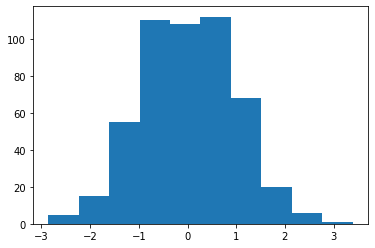

In [70]:
import matplotlib.pyplot as plt

plt.hist(z_group["Age"])

In [72]:
# Reemplazar cualquier posible NA (Not Available) con el promedio de los
# valores
fill_na_mean = lambda x : x.fillna(x.mean())

double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,126.969516,79.815446,34.404717,14709.415878
1,170.313672,24.260721,44.133110,18514.595255
2,180.896899,77.326882,15.501580,15143.313270
3,140.662430,37.277220,26.420433,23921.495647
4,127.120168,107.191656,24.108620,16664.287948
...,...,...,...,...
495,128.456076,79.739357,24.621769,21027.591578
496,212.577461,53.010999,36.761462,17523.903115
497,170.538269,49.306606,19.035936,14516.768378
498,146.979832,82.415586,23.659650,20633.112202


#### Operaciones diversas muy útiles

In [74]:
# Primera fila de cada uno de los grupos
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,126.969516,79.815446,34.404717,14709.415878
1,Female,Rich,170.313672,24.260721,44.133110,18514.595255
2,Male,Middle Class,180.896899,77.326882,15.501580,15143.313270
4,Male,Rich,127.120168,107.191656,24.108620,16664.287948
5,Female,Poor,113.236514,65.408331,39.499232,19879.273362
8,Male,Poor,207.483578,75.304966,28.978841,13619.215723


In [75]:
# Ultima fila de cada uno de los grupos
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
492,Female,Rich,212.287785,39.599530,41.054713,19619.724890
494,Male,Middle Class,169.915663,111.895004,27.113638,13931.067671
496,Female,Poor,212.577461,53.010999,36.761462,17523.903115
497,Male,Rich,170.538269,49.306606,19.035936,14516.768378
498,Male,Poor,146.979832,82.415586,23.659650,20633.112202
499,Female,Middle Class,177.286022,67.218357,12.799065,13994.935505


In [76]:
# Una fila especifica de cada uno de los elementos
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     186.117529  45.684169  23.141380  13558.230198
       Poor             143.505218  91.446119  27.051809  14464.710391
       Rich             191.611077  36.087900  24.998112  18574.686969
Male   Middle Class     162.364853  47.707613  32.534904  17892.623608
       Poor             102.633554  55.231133  24.023400  20183.887039
       Rich             139.894130  54.291007  10.817953  21794.381975

In [80]:
# Reordenar el dataframe
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
191,Female,Poor,130.792891,18.047233,-11.215104,20901.043113
340,Female,Poor,140.484846,103.301203,-4.661715,13358.690951
294,Female,Poor,186.845376,38.241897,-3.260817,15701.974019
276,Male,Poor,215.358075,77.355220,3.062497,19766.001232
310,Male,Rich,173.844683,58.631464,3.155489,22713.005736
324,Female,Middle Class,185.636828,86.408177,3.996465,11127.247690
47,Female,Middle Class,126.529553,44.844688,4.064128,17651.670218
32,Female,Rich,138.143708,65.154472,4.138814,21242.502061
192,Male,Rich,143.864113,76.450236,5.890116,20484.141341
190,Female,Rich,188.675688,48.787494,6.125200,17514.081568


In [82]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
191,Female,Poor,130.792891,18.047233,-11.215104,20901.043113
340,Female,Poor,140.484846,103.301203,-4.661715,13358.690951
294,Female,Poor,186.845376,38.241897,-3.260817,15701.974019
276,Male,Poor,215.358075,77.355220,3.062497,19766.001232
310,Male,Rich,173.844683,58.631464,3.155489,22713.005736
324,Female,Middle Class,185.636828,86.408177,3.996465,11127.247690
47,Female,Middle Class,126.529553,44.844688,4.064128,17651.670218
192,Male,Rich,143.864113,76.450236,5.890116,20484.141341
287,Male,Middle Class,204.262691,65.214307,6.235864,16631.352552
298,Male,Poor,116.933493,10.716938,6.715252,17740.420531


In [83]:
# Los mas viejos
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
222,Female,Poor,137.993365,104.820428,61.298112,15908.393627
396,Male,Poor,196.839151,30.258403,68.551966,17818.860904


In [84]:
# Los más jovenes
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
191,Female,Poor,130.792891,18.047233,-11.215104,20901.043113
276,Male,Poor,215.358075,77.355220,3.062497,19766.001232
